In [0]:
import os
import zipfile
import random
import numpy as np

In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/DRIVE.zip"\
    -O "/tmp/DRIVE.zip"

local_zip = '/tmp/DRIVE.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-11 09:58:55--  https://storage.googleapis.com/datsets/DRIVE.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29756930 (28M) [application/x-zip-compressed]
Saving to: ‘/tmp/DRIVE.zip’

/tmp/DRIVE.zip      100%[===================>]  28.38M  44.6MB/s    in 0.6s    

2020-04-11 09:58:56 (44.6 MB/s) - ‘/tmp/DRIVE.zip’ saved [29756930/29756930]



In [0]:
import subprocess,sys
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/11%20by%2011/patches11n11nskip2.zip"\
    -O "/tmp/patches.zip"

zipFile = '/tmp/patches.zip'
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])
# zip_ref   = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()


--2020-04-11 09:59:04--  https://storage.googleapis.com/datsets/model1/11%20by%2011/patches11n11nskip2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90376348 (86M) [application/x-zip-compressed]
Saving to: ‘/tmp/patches.zip’

/tmp/patches.zip    100%[===================>]  86.19M  62.1MB/s    in 1.4s    

2020-04-11 09:59:06 (62.1 MB/s) - ‘/tmp/patches.zip’ saved [90376348/90376348]



In [0]:
X = np.load('/tmp/patches11n11nskip2.npy')

In [0]:
X.shape

(1652720, 11, 11, 3)

In [0]:
y=np.load('/content/outputs.npy')
w=y//255
z=set(w)
y=w
y.shape

(1652720,)

In [0]:
X_train,X_val,y_train,y_val=X[0:1500000,:,:],X[1500000:1652720,:,:],y[0:1500000],y[1500000:1652720]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(11,11,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))
model.save('model1st11by11.hdf5')

Epoch 1/10
23438/23438 [==============================] - 86s 4ms/step - loss: 0.1399 - accuracy: 0.9549 - val_loss: 0.1030 - val_accuracy: 0.9613
Epoch 2/10
23438/23438 [==============================] - 85s 4ms/step - loss: 0.1162 - accuracy: 0.9584 - val_loss: 0.1046 - val_accuracy: 0.9619
Epoch 3/10
23438/23438 [==============================] - 85s 4ms/step - loss: 0.1139 - accuracy: 0.9593 - val_loss: 0.0977 - val_accuracy: 0.9628
Epoch 4/10
23438/23438 [==============================] - 84s 4ms/step - loss: 0.1126 - accuracy: 0.9598 - val_loss: 0.0991 - val_accuracy: 0.9631
Epoch 5/10
23438/23438 [==============================] - 85s 4ms/step - loss: 0.1120 - accuracy: 0.9597 - val_loss: 0.1036 - val_accuracy: 0.9621
Epoch 6/10
23438/23438 [==============================] - 84s 4ms/step - loss: 0.1107 - accuracy: 0.9599 - val_loss: 0.1103 - val_accuracy: 0.9619
Epoch 7/10
23438/23438 [==============================] - 84s 4ms/step - loss: 0.1148 - accuracy: 0.9599 - val_loss: 0

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 9, 9, 32)          896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 1,051,521
Trainable params: 1,051,521
Non-trainable params: 0
____________________________________________

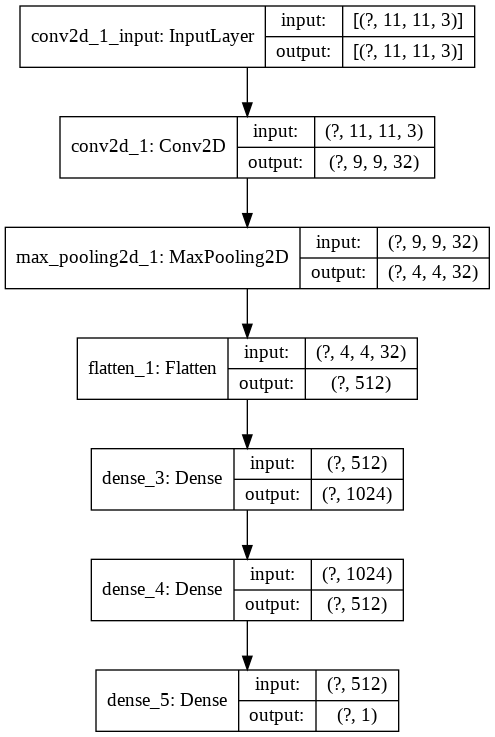

In [0]:
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

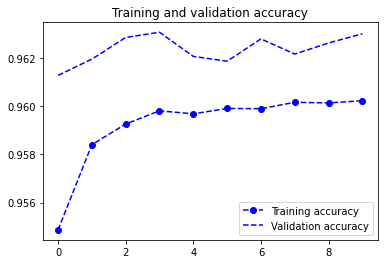

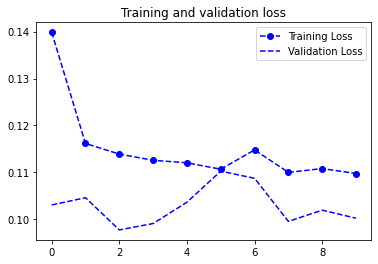

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linestyle='dashed')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',linestyle='dashed')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.summary()

NameError: ignored

In [0]:
history

AttributeError: ignored

In [0]:
import pandas as pd
df = pd.DataFrame(history.history)

In [0]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.139875,0.954871,0.103048,0.961269
1,0.116150,0.958401,0.104585,0.961943
2,0.113892,0.959255,0.097720,0.962840
3,0.112570,0.959803,0.099081,0.963057
4,0.112034,0.959679,0.103624,0.962055
5,0.110665,0.959899,0.110254,0.961858
6,0.114783,0.959892,0.108725,0.962782
7,0.109995,0.960155,0.099536,0.962153
8,0.110799,0.960131,0.101931,0.962611
9,0.109747,0.960220,0.100214,0.962991


In [0]:
df.to_excel('model1st21by21_history.xlsx')